In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager
prop = font_manager.FontProperties(fname="C:\WINDOWS\Fonts\opensans-light.ttf")
matplotlib.rcParams['font.family'] = prop.get_name()
matplotlib.rcParams['axes.facecolor'] = '#fbfbfb'

os.chdir('../..')


In [2]:
subjects = ['M002']

data_dir = 'localiser\Data'

dfs = []

for i in subjects:
    data_files = [pd.read_csv(os.path.join(data_dir, j)) for j in os.listdir(data_dir) if i in j]
    
    full_df = pd.concat(data_files)
    full_df['trial'] = range(0, len(full_df))
    full_df.True_answer = full_df.True_answer == 'True'
    full_df['hit'] = (full_df.True_answer == True) & (full_df.Response == 1)
    full_df['miss'] = (full_df.True_answer == True) & (full_df.Response == 0)
    full_df['correct'] = full_df.True_answer == full_df.Response
    dfs.append(full_df)
        

In [3]:
dfs[0].head()

,True_answer,Response,trial,hit,miss,correct
0,False,1,0,False,False,False
1,False,0,1,False,False,True
2,False,1,2,False,False,False
3,False,0,3,False,False,True
4,False,0,4,False,False,True


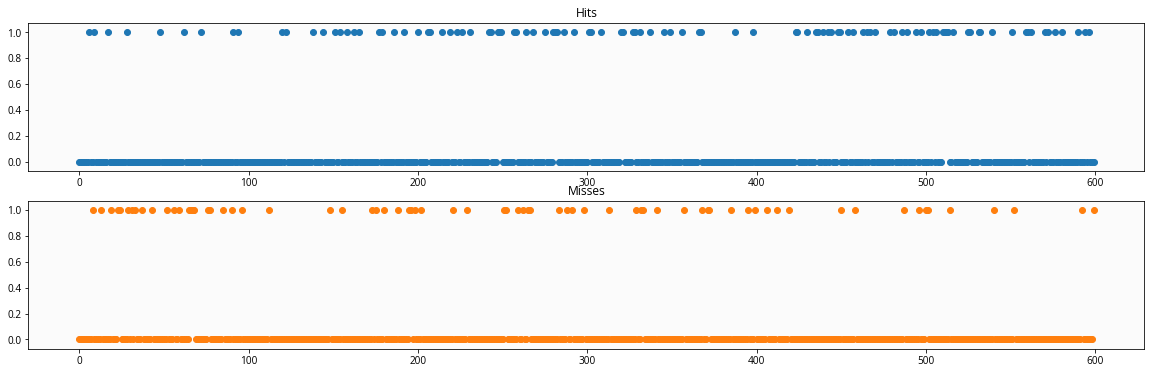

In [4]:
stop = 0
start = 840
n_trials = 600
f, ax = plt.subplots(2, figsize=(20, 6))
ax[0].scatter(range(len(dfs[0]))[:n_trials], dfs[0].hit[:n_trials])
ax[0].set_title("Hits")
ax[1].scatter(range(len(dfs[0]))[:n_trials], dfs[0].miss[:n_trials], c='tab:orange')
ax[1].set_title("Misses")
plt.show()

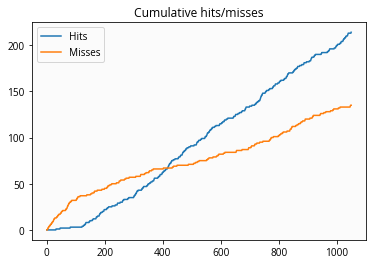

In [27]:
plt.plot(np.cumsum(dfs[0].hit.values), label='Hits', c='tab:blue')
plt.plot(np.cumsum(dfs[0].miss.values), label='Misses', c='tab:orange')
plt.title("Cumulative hits/misses")
plt.legend()
plt.show()